# Individual Project Planning

- DSCI_V100-009
- Rachel Hovestad
- Group 42

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Exploratory Data Analysis and Evaluation

First, let's load both of our datasets into R. For my analysis, I'll only be using the players dataset, but let's load both anyway so we can look at them. 

In [3]:
players <- read_csv("players.csv")

sessions <- read_csv("sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Now, let's find the mean value for each quantitative variable in the players dataset.

In [32]:
players_mean <- players |>
  summarise(mean_age = mean(Age, na.rm = TRUE), 
            mean_playtime = mean(played_hours, na.rm = TRUE))

players_mean

mean_age,mean_playtime
<dbl>,<dbl>
21.13918,5.845918


Next, let's do some minimal tidying of our players dataset (the dataset I'll be using for my analysis). We're going to remove all identifier variables (name and hashedEmail) and ensure that characters are turned into factors so we can use them for analysis later. 

In [35]:
tidy_players <- players |>
  select(-hashedEmail, -name) |>
  mutate(experience = as.factor(experience),
            gender = as.factor(gender))

head(tidy_players)

experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17


Now let's  make some visualizations to further understand our data! We're going to do so with the original players dataset. I want to look at each variable and their distributions while also ensuring each graph is very readable and engaging.

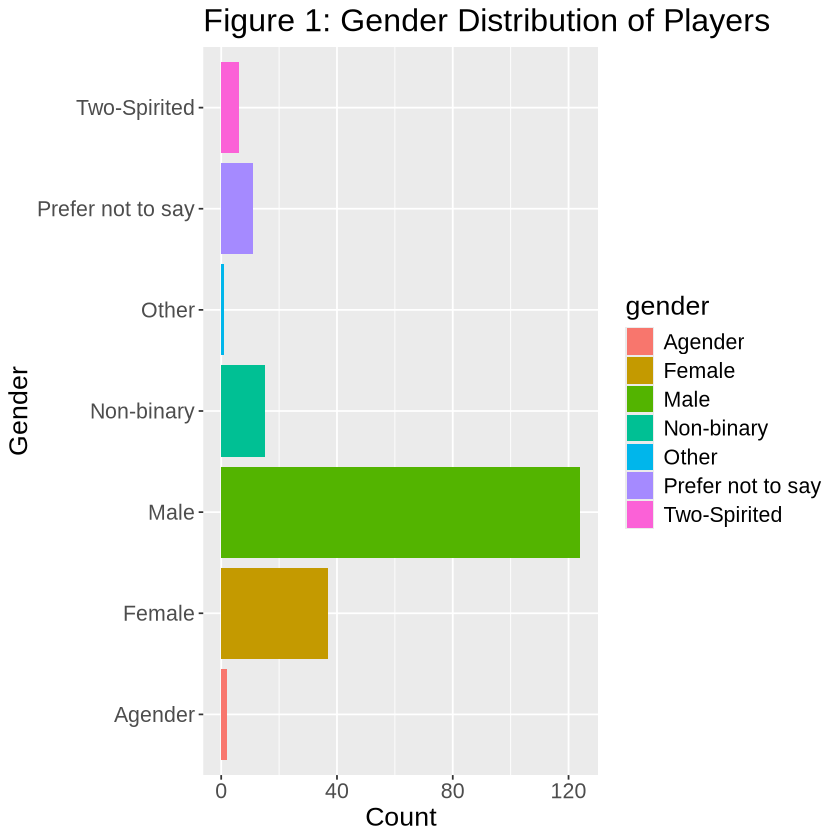

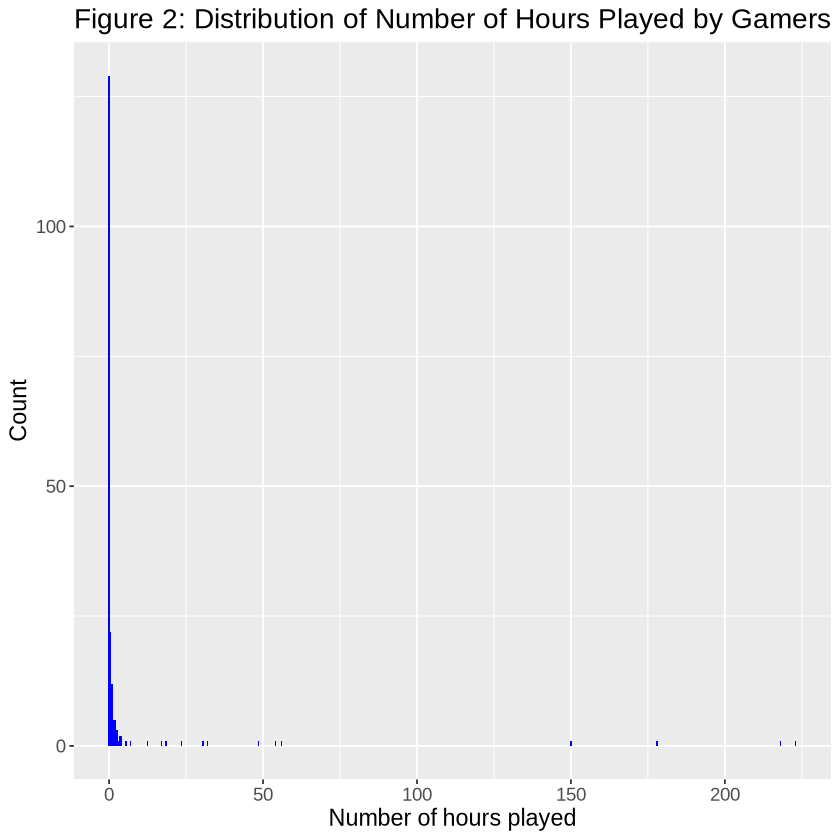

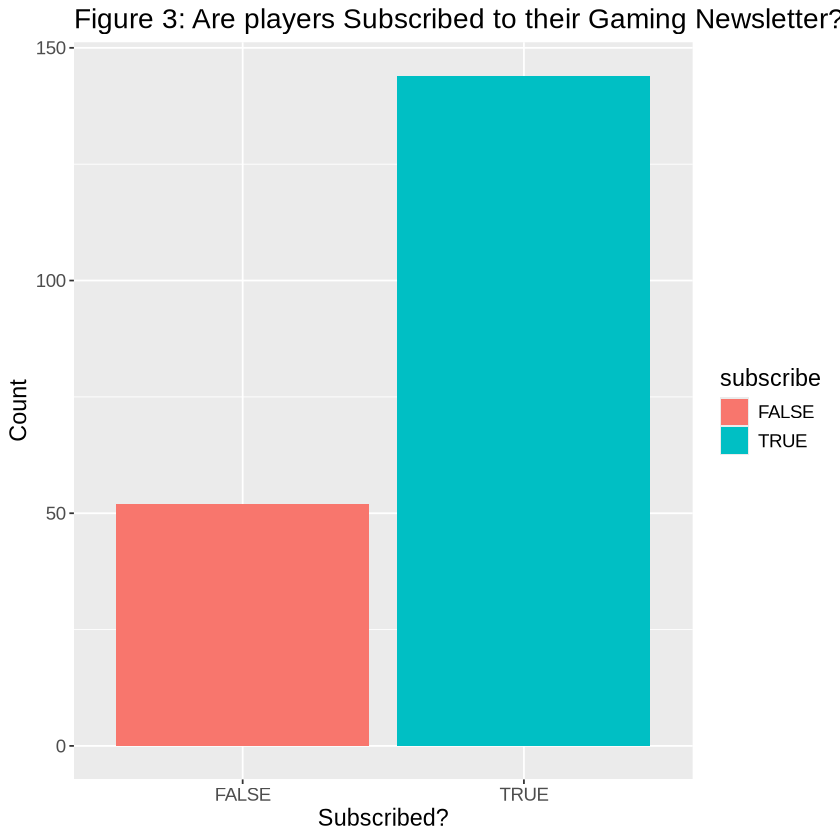

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


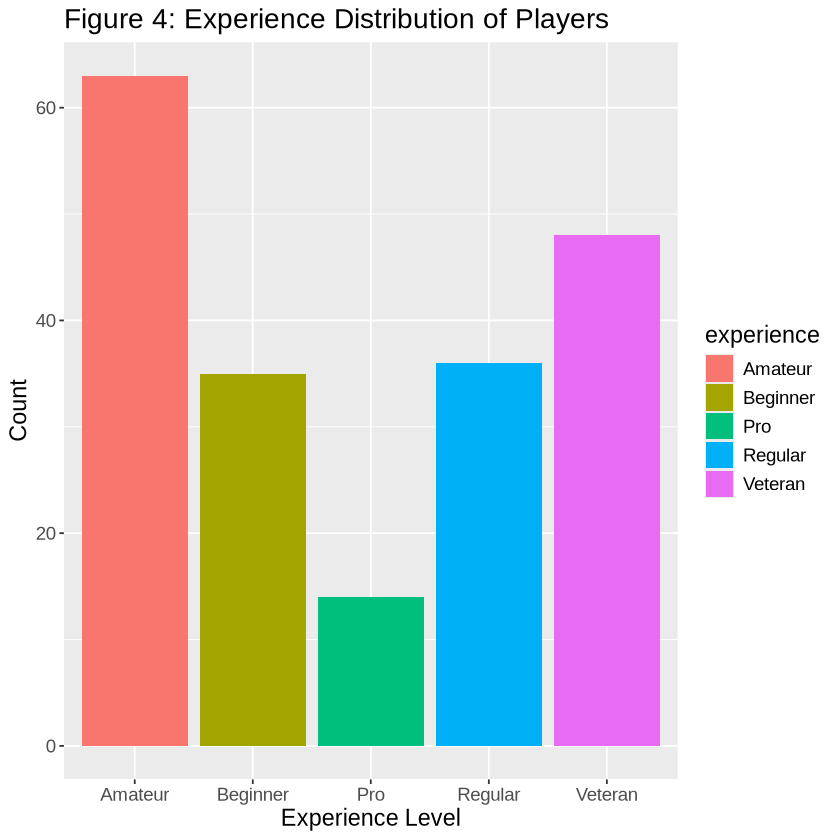

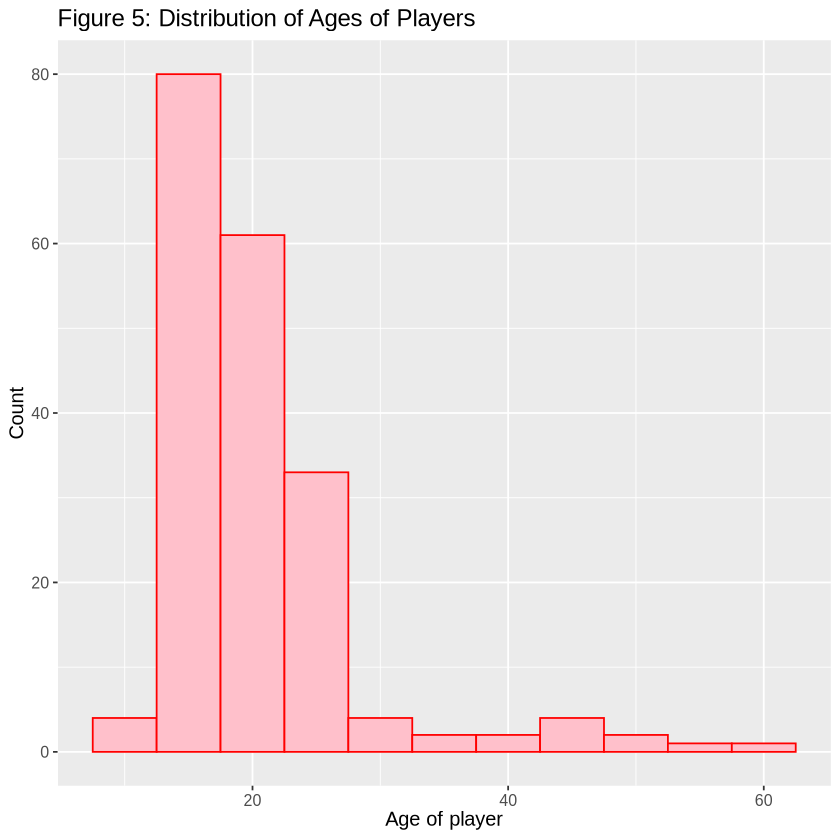

In [4]:
gender <- players |> 
    ggplot(aes(y = gender, fill = gender)) +
    geom_bar() +
    labs(title = "Figure 1: Gender Distribution of Players", x = "Count", y = "Gender") +
    theme(text = element_text(size = 16)) 
gender

play_distribution <- players |> 
ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 0.5, fill = "blue") +
    labs(x = "Number of hours played", y = "Count") +
    ggtitle("Figure 2: Distribution of Number of Hours Played by Gamers") +
    theme(text = element_text(size = 14))

play_distribution


subscribe <- players |> 
ggplot(aes(x = subscribe, fill = subscribe)) +
    geom_bar() +
    labs(x = "Subscribed?", y = "Count") +
    ggtitle("Figure 3: Are players Subscribed to their Gaming Newsletter?") +
    theme(text = element_text(size = 14))
subscribe


experience <- players |> 
    ggplot(aes(x = experience, fill = experience)) +
    geom_bar() +
    labs(title = "Figure 4: Experience Distribution of Players", x = "Experience Level", y = "Count") +
    theme(text = element_text(size = 14)) 
experience

age_distribution <- players |> 
    ggplot(aes(x = Age)) +
    geom_histogram(binwidth = 5, fill = "pink", color = "red") +
    labs(x = "Age of player", y = "Count") +
    ggtitle("Figure 5: Distribution of Ages of Players") +
    theme(text = element_text(size = 12))

age_distribution

#### Data Visualization Analysis

Looking at **Figure 1**, we can see that the majority of the observations were male, underrepresenting other gender identities. Looking at **Figure 2**, we can note that our graph is significantly skewed to the right, thus most players only played for a few minutes. With Minecraft being a very long game that requires many different steps and ways to complete the game, having gamers who only played for such brief amounts of time may not make the data very accurate in terms of what true Minecraft gamers look like. Looking at **Figure 3**, we can see that more than half of the gamers chose to subscribe to the newsletter. **Figure 4** shows us that most gamers self-identified as Amateur. Finally, **Figure 5** shows us that the majority of gamers were just under 20, probably  making them university students.

### Data Description

Let's look at the original players dataset and see what we can note about the data. We already learned a lot about the variables through data visualization, but let's look at statistics now!

In [38]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [8]:
stats_summary <- players |>
summarise(mean_age = mean(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    sd_played_hours = sd(played_hours, na.rm = TRUE),
    min_played_hours = min(played_hours, na.rm = TRUE),
    max_played_hours = max(played_hours, na.rm = TRUE), 
    median_played_hours = median(played_hours, na.rm = TRUE), 
    median_age = median(Age, na.rm = TRUE))
stats_summary

newsletter <- players |>
    count(subscribe)
newsletter

nrow(players) 
ncol(players)

gender <- players |>
   count(gender)
gender

mean_age,sd_age,min_age,max_age,mean_played_hours,sd_played_hours,min_played_hours,max_played_hours,median_played_hours,median_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.13918,7.389687,9,58,5.845918,28.35734,0,223.1,0.1,19


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


[1] 196

[1] 7

gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


#### How data was collected
This data were collected by a UBC Computer Science research group, led by Frank Wood. According to their website linked in the Project Description on Canvas, players chose to join a custom Minecraft server used for behavioral research, so they could train AI NPCS. Timestamps of how long each person played and basic demographic information (experience, gender, age) were recorded. Newsletter subscription was also collected, but it seems unclear what this newsletter entails exactly. 


#### Variable Descriptions
**Experience**: a factor, either Beginner, Amateur, Pro or Veteran

**Subscribe**: a boolean, either true or false: are users subscribed to the newsletter

**played_hours**: a double, the number of hours a player contributed to the project through playtime

**gender**: a string, the self-identified gender of a player

**Age**: an integer, the age of a player

#### Summary Statistics

- Number of observations (rows): 196
- Number of variables (columns): 7


- Our *maximum* **played_hours** is (hours): 223.1
- Our *minimum* **play_hours** is (hours): 0


- Number of newsletter **subscribers**: 144
- Number of **non-subscribers**: 52


- *Mean* of **Age**: 21.14
- *Standard Deviation* of **Age**: 7.39
- *Median* of **Age**: 19
- *Mean* of **played_hours**: 5.85
- *Standard Deviation* of **played_hours**: 28.36
- *Median* of **played_hours**: 0.1



#### Gender Identity Breakdown

- Agender: 2
- Female: 37
- Male: 124
- Non-binary: 15
- Other: 1
- Prefer not to say: 11
- Two-spirited: 6


#### Potential Issues
Sampling bias: 75% of players are male, which might create demographic issues. 

Newsletter subscription definition: It’s unclear what the newsletter content was, which limits interpretability of “subscription” as an engagement metric.


Self-reported data: Experience level and age may be inaccurate or inconsistent because gamers self declared this.

Engagement bias: Players who chose to join the UBC Minecraft server may differ from the general gaming population.

Limited behavioral detail: Only playtime is available; no data on play style (ex. building, exploring).

Skewness: The variable *played_hours* is heavily skewed right (most players play for very little time). 

### Questions

I wanted to complete the Exploratory Data Analysis and Visualization and the Data before formulating a question to analyze. Now that that's done, I've noticed many things that have helped me choose the specific question I want to analyze. Seeing the massive skewness in some variables and the greater representation of men (75%) in the dataset, I have decided I want to further examine the reasearch group's second broad question of interest: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

Reflecting on this broad question, I have narrowed it down into a more specific question I will be exploring: **Can we use age, play hours, and experience to predict subscription of the newsletter?**

- My **response** variable is: *subscribe*
- My **explanatory** variables are: *Age*, *play_hours*, *experience*

The variables recorded in the players dataset can be used to see if we can use demographics and behaviour to predict whether or not an individual would subscribe to the newsletter. To make this dataset suitable for analysis, we can wrangle it to ensure it is suitable and consistent. 

I would use the our tidy dataset that I produced earlier in Exploratory Data Analysis. Next, due to skewness of played_hours (Figure 2), I might choose to omit any players that played less than a specific number of minutes, and then upscale to ensure we have more datapoints. I will split the dataset into training and testing subsets, for example, 70% for training and 30% for testing, so that the predictive model can be trained on one portion of the data and evaluated on unseen observations. These wrangling steps will prepare a clean, well-structured dataset ready for modeling.

### Methods and Plans

To answer the question **“Can we use age, play hours, and experience to predict subscription to the newsletter?”**, I propose using the **k-nearest neighbors (k-NN) classification algorithm**. 

#### Why is this method appropriate

Because the target variable subscribe is binary (subscribe vs. not subscribe), and we have a small set of predictors (*Age*, *played_hours*, *experience*), k-NN offers a straightforward and interpretable classification method that fits our analysis. k-NN classifies a new observation by finding its k closest training-observations, then assigning the class most common among those neighbours.

#### Which assumptions are required, if any, to apply the method selected?

1. The variable *experience* is self-reported (i.e., “Pro,” “Amateur,” “Beginner”). k-NN would have to assume these labels are accurate enough to meaningfully compare players. If players misreport their experience, the distance between players may not reflect their true similarity, which can weaken the model’s predictions.

2. k-NN is a local method, meaning it makes predictions by looking at the players who are closest in age, play hours, and experience. For this to work well, the dataset needs to have enough nearby players around each observation. If certain combinations of characteristics are rare, the model may not have good neighbours to learn from, leading to unstable or unreliable predictions. So, k-NN assumes that each player has a reasonable number of similar players in the dataset to base predictions on.

3. k-NN assumes that players who are close to each other in the predictor space tend to behave similarly. If two players have similar characteristics, they should have similar chances of subscribing to the newsletter. This assumption is important because k-NN makes predictions based on the behaviour of the closest neighbours. If closeness in the predictors does not correspond to similar outcomes, then k-NN can't make accurate predictions.

#### Potential weaknesses and limitations
One limitation of k-NN is that its performance depends heavily on having good, meaningful neighbors; if the data is sparse or unevenly distributed, predictions can become unreliable. The method is also sensitive to the scale of the variables, so if features are not properly standardized, one variable can dominate the distance calculation. Additionally, k-NN can struggle when classes are imbalanced or when experience labels are inaccurate, since it relies directly on the data to make decisions. Finally, because k-NN stores all training data, it can become slower as the dataset grows.

#### How I will compare and select model
- I will standardize and center the data
- After a second opinion, I will use a train–test split and perform 5-fold cross-validation on the training set to choose the best k-NN model
- I will focus on tuning the number of neighbors (k) like we've learned in class
- I will compare models using accuracy and the confusion matrix, since these show how well the model predicts both subscribers and non-subscribers

#### Process
I will first clean and standardize the predictors (*Age*, *play_hours*, and *experience*). Then I will split the dataset into 80% training and 20% testing (dependent on a second opinion from a TA or peer), with the split happening after all wrangling is complete. On the training set, I will use 5-fold cross-validation to choose the best value of k. The final model will then be evaluated. 